# 本节内容
1. [简介](#简介)
2. [Python库](#Python库)
3. [问题域](#问题域)
4. [第一步：提出问题](#提出问题)
5. [第二步：数据检查](#数据检查)
6. [第三部：数据整理（tidying）](#数据整理)
7. [第四步：数据探索](#数据探索)
8. [第五步：数据分类](#数据分类)
9. [可重复性](#可重复性)

# 简介
[回到顶部](#本节内容)

本小节力图通过一个简单的例子来让你对如何基于Python的数据分析（机器学习）流程有一个初步概念。同时需要注意这个流程是不完备的，更多的内容我们会在后续章节陆续展开。

# Python库
[回到顶部](#本节内容)

首先我们使用的是Anaconda Python distribution

使用到的包：
+ Numpy
+ Pandas
+ scikit-learn
+ matplotlib
+ Seaborn

如果你现在还没有安装以上的包，可以用conda命令：
   
    conda install numpy pandas scikit-learn seaborn

如果你的包不是最新版本conda会提醒你。


# 问题域
[回到顶部](#本节内容)

蝴蝶花（iris）的识别？

### Iris setosa
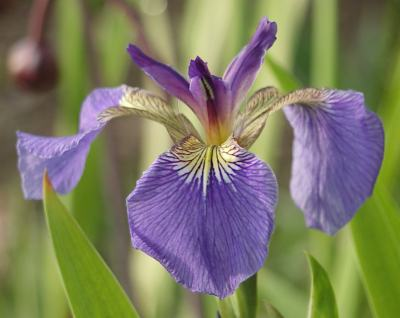
### Iris vesicolor
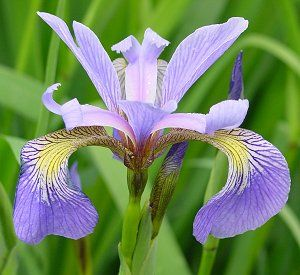
### Iris virginica
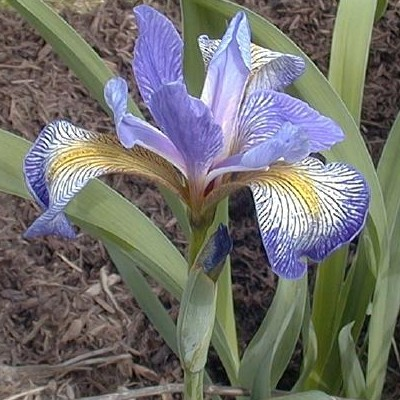

** 如何将问题与数据对应？图像识别？或者有其他方式？因此问题总是与领域知识有关的！！！ **

不同类型的蝴蝶花的萼片以及滑板的长宽有区别（sepal,petal),对应数据：
+ sepal length
+ sepal width
+ petal length
+ petal width
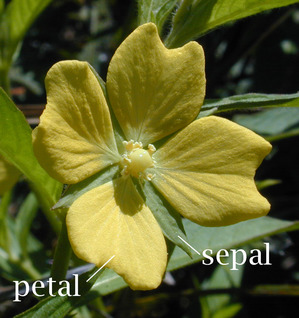

因此我们收集了对应数据集--其实通过图像识别也可以自动获得这些数据 Apple store上的leafsnap

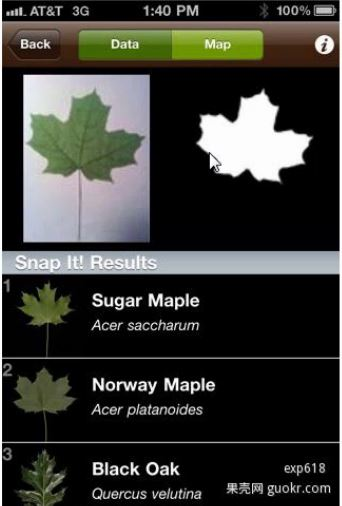

数据源：数据集来自iris data set,不过我们使用了Randal S.Olson基于此修改的数据集来演示数据清洗与整理。

# 提出问题
[回到顶部](#本节内容)

数据分析的第一步就是定义：
+ problem
+ measure/measures

>我们的问题是什么？

基于sepal length,sepal width,petal length,petal width来对蝴蝶花进行分类。
>问题成功解决的度量方式？应该达到多少？

分类问题，简单起见我们这里采用accuracy
>解决这个问题对应的商业应用或科研场景？

>不要忘了数据收集（试验设计）的方式？

>在这之前有无现成数据？


# 数据检查
[回到顶部](#本节内容)

+ 错误数据？
+ 异常数据？
+ 删除或者修正？

这里我们会用到pandas


In [2]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)

In [3]:
import pandas as pd

iris_data = pd.read_csv('D:\GitHub\python-file\iris\iris-data.csv')
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


每一行是对一种类型花的4种度量结果以及对应的标记（label），feature的name也很清晰。

**那有没有缺失数据呢？**

In [4]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.isnull().values.any()

True

In [6]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [7]:
iris_data = pd.read_csv('D:\GitHub\python-file\iris\iris-data.csv',na_values=['NA'])#pandas缺省对NA已经处理了

In [8]:
iris_data['petal_width_cm'].isnull().sum()

5

pandas中关于missing data处理 http://pandas.pydata.org/pandas-docs/stable/missing_data.html

数据可视化

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

seaborn里面的scatterplot matrix是常用的一种可视化图，它将每列的分布在对角线上画出，同时也画出了每两列的散点图，同时你也可以利用hue变量来指定颜色。

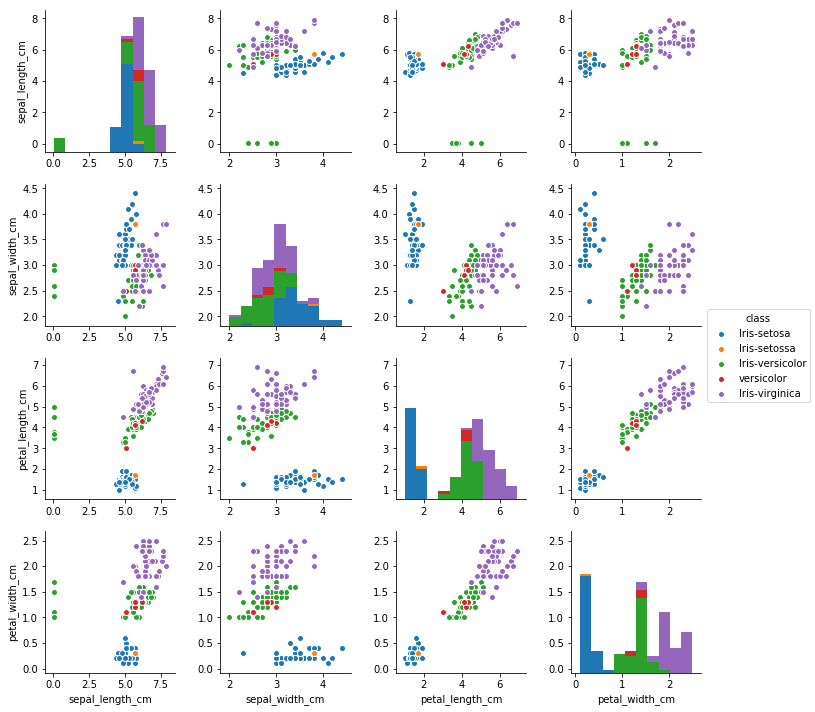

In [10]:
sb.pairplot(iris_data.dropna(),hue='class')

问题：

    1. 不是3种花吗？怎么变成了5种？
    2. 可疑的异常数据有一个Iris-setosa样本的spetal_width_cm偏离大部分点。同时有几个Iris-versicolor样本的sepal_length_cm也不太对？
    3. 缺失点如何处理？-删除？

# 数据整理
[回到顶部](本节内容)

In [11]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [12]:
iris_data.loc[iris_data['class'] == 'versicolor','class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa','class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**处理异常数据时永远要存有疑问！是测量误差，录入误差？我这样处理合理吗？**

这里简单起见，我们直接把spetal_width_cm在2.5cm以下的Iris-setosa样本去掉了

In [13]:
iris_data.loc[iris_data['class']=='Iris-setosa','sepal_width_cm'].describe()

count    50.000000
mean      3.418000
std       0.381024
min       2.300000
25%       3.125000
50%       3.400000
75%       3.675000
max       4.400000
Name: sepal_width_cm, dtype: float64

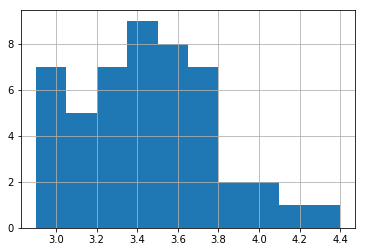

In [14]:
iris_data = iris_data.loc[(iris_data['class']!='Iris-setosa')|
                          (iris_data['sepal_width_cm']>=2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa','sepal_width_cm'].hist()

接下来处理Iris-versicolor

In [15]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & 
             (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


小数点位置错了？（这里你需要回到获取数据的阶段，去询问！）假设这里是录入的以m为单位

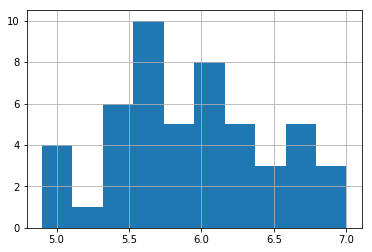

In [16]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
             (iris_data['sepal_length_cm'] < 1.0),
             'sepal_length_cm'] *= 100

iris_data.loc[iris_data['class'] == 'Iris-versicolor','sepal_length_cm'].hist()

处理缺失数据

In [17]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


似乎都是Iris-setosa类型，如果drop是否会使得样本不均衡（imbalance）？

采用**mean imputation**?

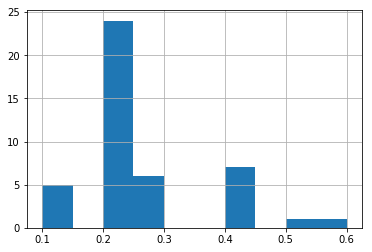

In [18]:
iris_data.loc[iris_data['class'] == 'Iris-setosa','petal_width_cm'].hist()

In [19]:
average_petal_width = iris_data.loc[iris_data['class'] == 'Iris-setosa','petal_width_cm'].mean()

iris_data.loc[(iris_data['class'] == 'Iris-setosa') & 
             (iris_data['petal_width_cm'].isnull()),
              'petal_width_cm'] = average_petal_width

iris_data.loc[(iris_data['class'] == 'Iris-setosa') &
             (iris_data['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [20]:
iris_data.loc[(iris_data['sepal_length_cm'].isnull()) |
              (iris_data['sepal_width_cm'].isnull()) |
              (iris_data['petal_length_cm'].isnull()) |
              (iris_data['petal_width_cm'].isnull())]


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


当然你也可以采用iris_data.dropna(inplace=True)

In [21]:
iris_data.to_csv('D:\GitHub\python-file\iris\iris-data-clean.csv',index=False)

iris_data_clean = pd.read_csv('D:\GitHub\python-file\iris\iris-data-clean.csv')

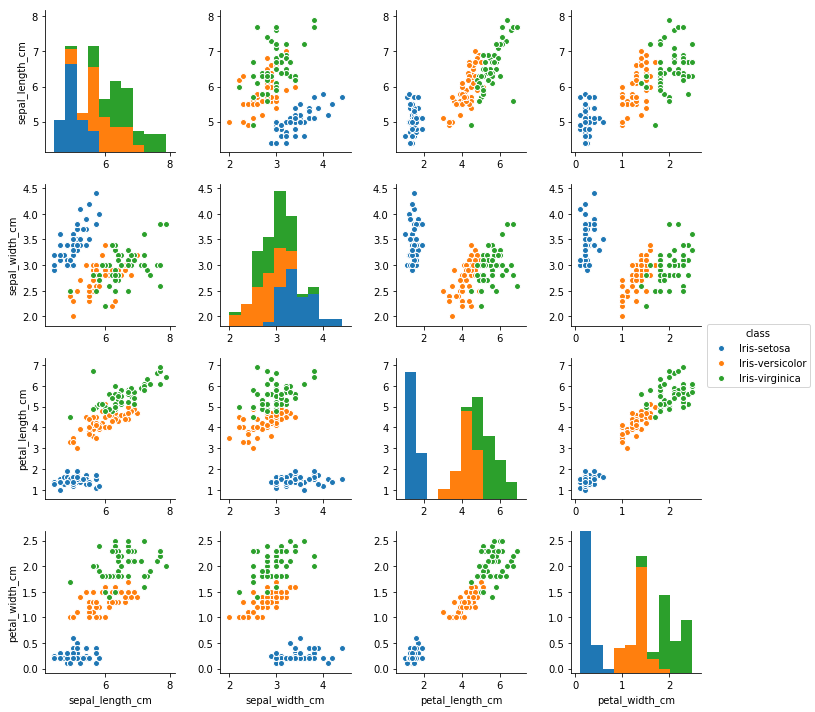

In [22]:
sb.pairplot(iris_data_clean,hue='class')

真实的场景可能复杂得多，我们通常考虑：
+ 确定数据正确
+ 异常数据（领域知识，可视化）
+ 处理缺失数据
+ 清理数据过程要可重复
+ 可视化

# 数据探索
[回到顶部](#本节内容)

数据探索分析帮助我们了解：
+ 数据分布？
+ 数据间存在相关性？
+ 有无confounding factors来解释correlations？

混杂因素（confounding factor）在设计时，利用限制的方法和配比的方法，资料分析阶段，采用分层分析或多因素分析模型处理，可适当控制混杂偏倚，控制在设计时

-wikipedia http://en.wikipedia.org/wiki/Confounding

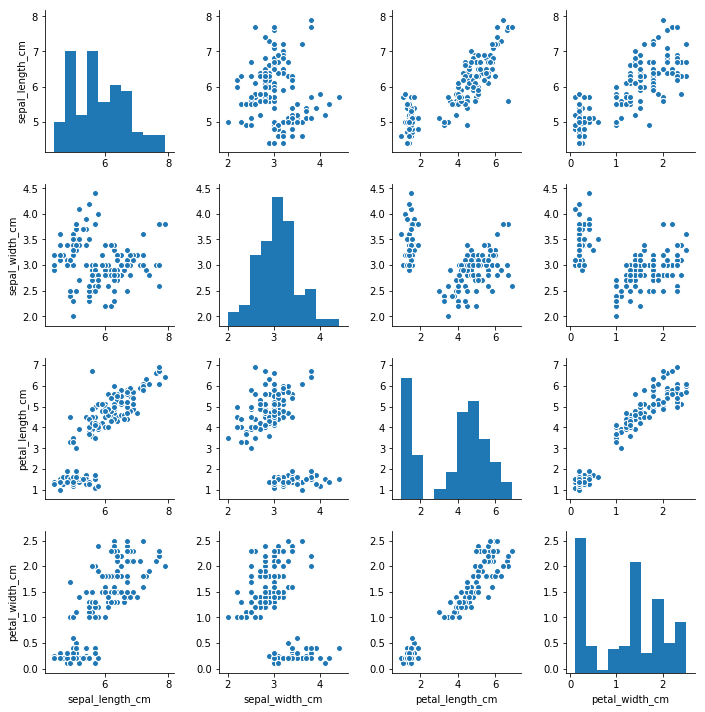

In [23]:
sb.pairplot(iris_data_clean)

大部分情况下数据接近正态分布，因此我们选择模型时使用那些假设数据为正态分布的模型。

不过petal的数据似乎不是单峰的，也许与花的类型有关？

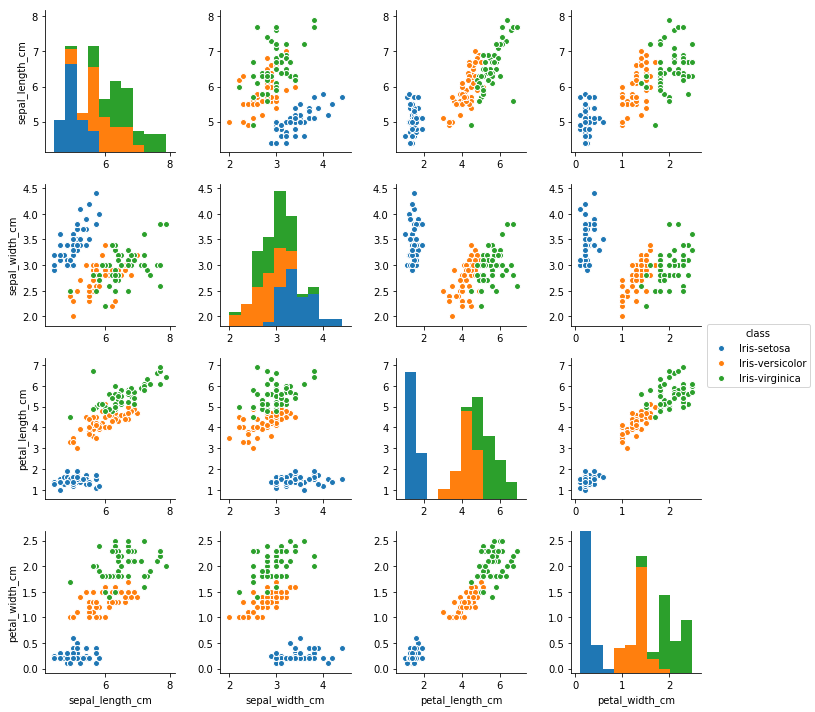

In [24]:
sb.pairplot(iris_data_clean,hue='class')

果然如此！不同类型的花的petal确实不同，那我们肯定可以用它来区分花的类型。比如Iris-setosa。不过Iris-versicolor与Iris-vieginca还存在一些重叠

同时我们可以看出petal length与petal width存在相关关系。sepal length与sepal width也类似。

我们也可以使用**violin plots**来更详细地观察数据分布。Violin plots实际是箱图的一种box plots,只是加上了数据分布密度。

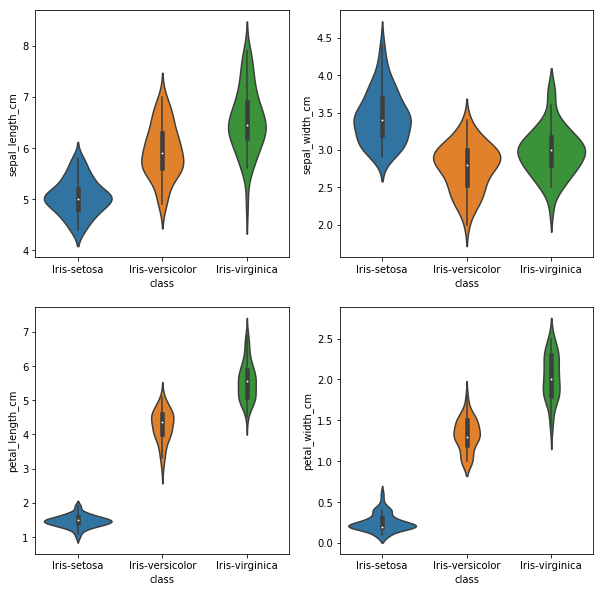

In [29]:
plt.figure(figsize=(10,10))

for column_index,column in enumerate(iris_data_clean.columns):
    if column == 'class':
        continue
    plt.subplot(2,2,column_index + 1)
    sb.violinplot(x='class',y=column,data=iris_data_clean)

# 数据分类
[回到顶部](#本节内容)

What?搞了这么久才进入主题？

**garbage in garbage out**

数据分为训练集与测试集
+ **training set** 所有数据的一个随机子集，用于训练模型
+ **testing set** 用来验证模型在未知数据上的表现

避免**overfitting**以及**underfitting**

In [39]:
iris_data_clean = pd.read_csv('D:\GitHub\python-file\iris\iris-data-clean.csv')

#scikit-learn需要我们输入numpy array

all_inputs = iris_data_clean[['sepal_length_cm','sepal_width_cm',
                            'petal_length_cm','petal_width_cm']].values
all_classes = iris_data_clean['class'].values

all_inputs[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [38]:
all_classes[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

测试训练集

In [40]:
from sklearn.cross_validation import train_test_split

(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs,all_classes,train_size=0.75,random_state=1)

In [51]:
import sklearn
print("skit-learn version:{}".format(sklearn.__version__))

skit-learn version:0.19.1


In [52]:
from sklearn.model_selection import train_test_split
(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs,all_classes,train_size=0.75,random_state=1)
#0.18后使用model_selection模块

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


这里我们先使用决策树模型

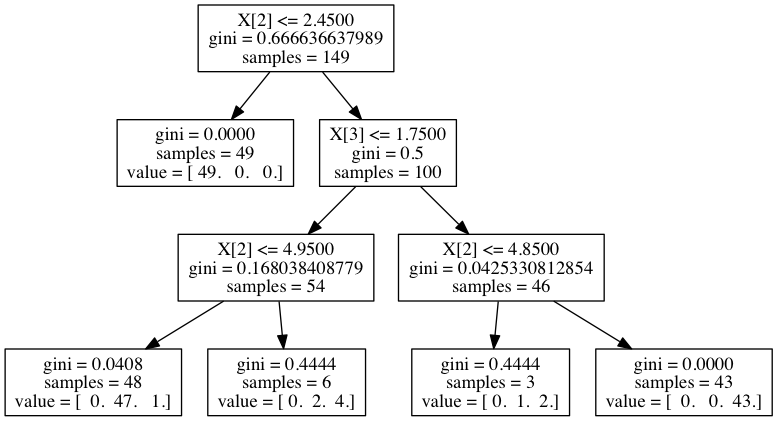

决策树模型的一个优点是不受每个特征数据不同scale影响

更详细的[parameters](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [54]:
from sklearn.tree import DecisionTreeClassifier

#create the classifier
decision_tree_classifier = DecisionTreeClassifier()

#Train the classifier on the training set
decision_tree_classifier.fit(training_inputs,training_classes)

#Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs,testing_classes)

0.97368421052631582

看起来很好，97%的accuracy

不过这只是在这一种traintest.split的情况下的结果！

In [59]:
decision_tree_classifier.predict(testing_inputs[1:5])

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [57]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs,all_classes,train_size = 0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs,training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs,testing_classes)
    model_accuracies.append(classifier_accuracy)
    

(array([   1.,    5.,   21.,    0.,   84.,  230.,    0.,  317.,  248.,   94.]),
 array([ 0.81578947,  0.83421053,  0.85263158,  0.87105263,  0.88947368,
         0.90789474,  0.92631579,  0.94473684,  0.96315789,  0.98157895,  1.        ]),
 <a list of 10 Patch objects>)

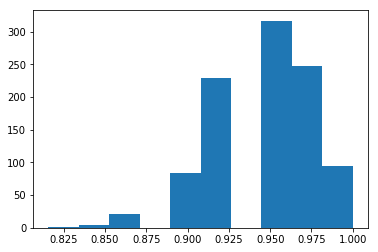

In [58]:
plt.hist(model_accuracies)

显然测试训练集不同，模型的performance不同，显然存在**overfitting**，训练模型训练得过好，泛化不行！

In [62]:
from sklearn.linear_model import LogisticRegression

#create the classifier
logistic_classifier = LogisticRegression()

#Train the classifier on the training set
logistic_classifier.fit(training_inputs,training_classes)

#Validate the classifier on the testing set using classification accuracy
logistic_classifier.score(testing_inputs,testing_classes)

0.97368421052631582

In [65]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes) = train_test_split(all_inputs,all_classes,train_size = 0.75)
    
    logistic_classifier = LogisticRegression()
    logistic_classifier.fit(training_inputs,training_classes)
    classifier_accuracy = logistic_classifier.score(testing_inputs,testing_classes)
    model_accuracies.append(classifier_accuracy)

(array([   6.,   12.,   48.,    0.,  105.,  206.,    0.,  257.,  232.,  134.]),
 array([ 0.81578947,  0.83421053,  0.85263158,  0.87105263,  0.88947368,
         0.90789474,  0.92631579,  0.94473684,  0.96315789,  0.98157895,  1.        ]),
 <a list of 10 Patch objects>)

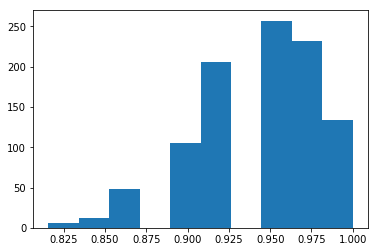

In [66]:
plt.hist(model_accuracies)

### Cross-validation
[回到顶部](#本节内容)

[ 1.          0.93333333  1.          0.93333333  0.93333333  0.86666667
  0.93333333  0.93333333  1.          1.        ]


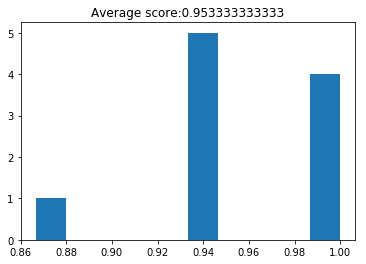

In [70]:
import numpy as np
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

#cross_val_score return a list of the scores,which we can visualize
#to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier,all_inputs,all_classes,cv=10)
plt.hist(cv_scores)
plt.title('Average score:{}'.format(np.mean(cv_scores)))
print(cv_scores)

In [75]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV,StratifiedKFold
random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [5, 10, 25, 50],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],
                  'warm_start': [True, False]}

cross_validation = StratifiedKFold(n_splits=10,random_state=2017)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.96644295302
Best parameters: {'max_features': 2, 'n_estimators': 5, 'criterion': 'gini', 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

# 可重复性
[回到顶部](#本节内容)

可以使用工具watermark

In [78]:
#!pip install watermark

  Running setup.py bdist_wheel for watermark: started
  Running setup.py bdist_wheel for watermark: finished with status 'done'
  Stored in directory: C:\Users\Mila Yao\AppData\Local\pip\Cache\wheels\7b\5b\1b\0bc31735755ed06b7b460e49e5bb8a571065265b3cc190fce5
Successfully built watermark


In [80]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [81]:
%watermark?

In [84]:
%watermark -a 'charlotteyao' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn

charlotteyao Sun Nov 19 2017 

CPython 2.7.14
IPython 5.4.1

numpy 1.13.3
pandas 0.20.3
sklearn 0.19.1
matplotlib 2.1.0
seaborn 0.8.0

compiler   : MSC v.1500 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores  : 8
interpreter: 64bit


In [87]:
%matplotlib inline
import pandas as pd
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

# We can jump directly to working with the clean data because we saved our cleaned data set
iris_data_clean = pd.read_csv('iris-data-clean.csv')

# Testing our data: Our analysis will stop here if any of these assertions are wrong

# We know that we should only have three classes
assert len(iris_data_clean['class'].unique()) == 3

# We know that sepal lengths for 'Iris-versicolor' should never be below 2.5 cm
assert iris_data_clean.loc[iris_data_clean['class'] == 'Iris-versicolor', 'sepal_length_cm'].min() >= 2.5

# We know that our data set should have no missing measurements
assert len(iris_data_clean.loc[(iris_data_clean['sepal_length_cm'].isnull()) |
                               (iris_data_clean['sepal_width_cm'].isnull()) |
                               (iris_data_clean['petal_length_cm'].isnull()) |
                               (iris_data_clean['petal_width_cm'].isnull())]) == 0

all_inputs = iris_data_clean[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_classes = iris_data_clean['class'].values

# This is the classifier that came out of Grid Search
random_forest_classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                                max_depth=None, max_features=3, max_leaf_nodes=None,
                                min_samples_leaf=1, min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                                oob_score=False, random_state=None, verbose=0, warm_start=True)

# All that's left to do now is plot the cross-validation scores
rf_classifier_scores = cross_val_score(random_forest_classifier, all_inputs, all_classes, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='white')

# ...and show some of the predictions from the classifier
(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)

random_forest_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:10],
                                              random_forest_classifier.predict(testing_inputs[:10]),
                                              testing_classes[:10]):
    print('{}\t-->\t{}\t(Actual: {})'.format(input_features, prediction, actual))
